In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

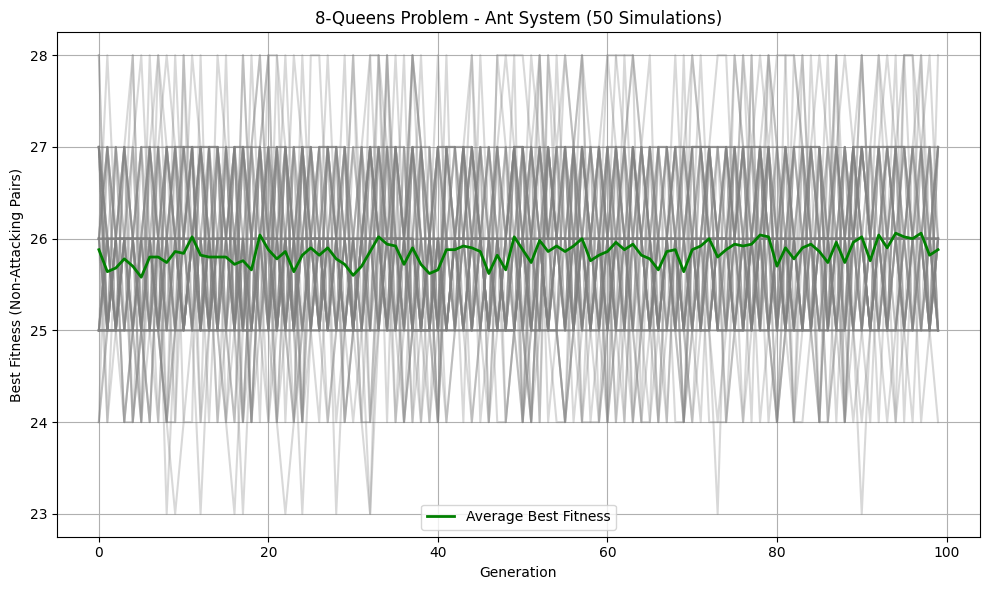

In [8]:
# ----------------------
# Utilities for Problem 2: 8-Queens Problem
# ----------------------

def fitness_8_queens(positions: list[int]) -> int:
    """Calculate the number of non-attacking pairs of queens."""
    n = len(positions)
    non_attacking = 0
    for i in range(n):
        for j in range(i + 1, n):
            if positions[i] != positions[j] and \
               abs(positions[i] - positions[j]) != abs(i - j):
                non_attacking += 1
    # There are n*(n-1)/2 total pairs
    return non_attacking

class AntColonyEightQueens:
    def __init__(self, n=8, num_ants=10, generations=100, alpha=1.0, beta=2.0, rho=0.1):
        self.n = n
        self.num_ants = num_ants
        self.generations = generations
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.pheromone = np.ones((n, n))  # pheromone[i][j] = desirability of placing queen at row i, column j

    def heuristic(self, row, col):
        """Simple heuristic: uniform desirability."""
        return 1.0

    def select_column(self, row, available_cols):
        probs = []
        for col in available_cols:
            tau = self.pheromone[row][col] ** self.alpha
            eta = self.heuristic(row, col) ** self.beta
            probs.append(tau * eta)
        total = sum(probs)
        if total == 0:
            probs = [1 / len(probs)] * len(probs)
        else:
            probs = [p / total for p in probs]
        return random.choices(available_cols, weights=probs, k=1)[0]

    def construct_solution(self):
        solution = [-1] * self.n
        available_cols = list(range(self.n))
        for row in range(self.n):
            if not available_cols:
                break
            col = self.select_column(row, available_cols)
            solution[row] = col
            available_cols.remove(col)
        return solution

    def run(self):
        best_fitness_per_gen = []
        avg_fitness_per_gen = []
        best_solution = []
        best_fitness = -1
        max_pairs = self.n * (self.n - 1) // 2

        for gen in range(self.generations):
            all_solutions = []
            all_fitnesses = []
            pheromone_delta = np.zeros_like(self.pheromone)

            for _ in range(self.num_ants):
                sol = self.construct_solution()
                fit = fitness_8_queens(sol)
                all_solutions.append(sol)
                all_fitnesses.append(fit)

                # Update pheromones
                for row in range(self.n):
                    col = sol[row]
                    if col != -1:
                        pheromone_delta[row][col] += fit

                if fit > best_fitness:
                    best_fitness = fit
                    best_solution = sol

            # Evaporation and deposit
            self.pheromone = (1 - self.rho) * self.pheromone + pheromone_delta

            best_fitness_per_gen.append(max(all_fitnesses))
            avg_fitness_per_gen.append(sum(all_fitnesses) / len(all_fitnesses))

        return best_fitness_per_gen, avg_fitness_per_gen, best_solution

# ----------------------
# Run Monte Carlo Simulation for 8-Queens
# ----------------------

NUM_SIMULATIONS_Q2 = 50
GENERATIONS_Q2 = 100
all_best_fitnesses_q2 = []

for sim in range(NUM_SIMULATIONS_Q2):
    colony_q2 = AntColonyEightQueens(n=8, generations=GENERATIONS_Q2)
    best_fitness_per_gen_q2, _, _ = colony_q2.run()
    all_best_fitnesses_q2.append(best_fitness_per_gen_q2)

# Average best fitness
avg_best_fitness_q2 = np.mean(all_best_fitnesses_q2, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
for run in all_best_fitnesses_q2:
    plt.plot(run, color='gray', alpha=0.3)
plt.plot(avg_best_fitness_q2, color='green', linewidth=2, label='Average Best Fitness')
plt.title('8-Queens Problem - Ant System (50 Simulations)')
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Non-Attacking Pairs)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
